**Problem Definition: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**

**Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

zip_path = "archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")  # folder name where contents will be extracted

# To check files
os.listdir("unzipped_folder")


['archive']

In [ ]:
import os

# Check extracted contents
files = os.listdir("unzipped_folder")
print(files)


['archive']


In [ ]:
nested_path = "unzipped_folder/archive"
files = os.listdir(nested_path)
print(files)


['US_Accidents_March23.csv']


In [ ]:
#In pandas, chunksize lets you load a large dataset in small, manageable pieces, called “chunks”, instead of loading the entire file into memory at once.
#Avoid Memory Crashes,Process Big Data Efficiently

import pandas as pd
chunks = pd.read_csv("unzipped_folder/archive/US_Accidents_March23.csv", chunksize=50000)
for chunk in chunks:
    # process chunk safely
    print(chunk.shape)
    break  # just show the first one


(50000, 46)


**Preprocessing**

In [ ]:
#Load only useful columns
useful_cols = ['Start_Time', 'Weather_Condition', 'Start_Lat', 'Start_Lng', 'Severity']
df = pd.read_csv("unzipped_folder/archive/US_Accidents_March23.csv", usecols=useful_cols)


In [ ]:
df.head();


In [ ]:
df.info()#Displays column names, data types, non-null counts, and memory usage
df.describe(include='all') #Gives summary statistics for all columns (numeric & categorical)
df.isnull().sum()#Tells you how many missing (null) values are in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Weather_Condition  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 294.8+ MB


,0
Severity,0
Start_Time,0
Start_Lat,0
Start_Lng,0
Weather_Condition,173459


In [ ]:
df.columns # view columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Weather_Condition'],
      dtype='object')

In [ ]:
#Convert date and extract time-related features:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

**Analyze accident by hour**

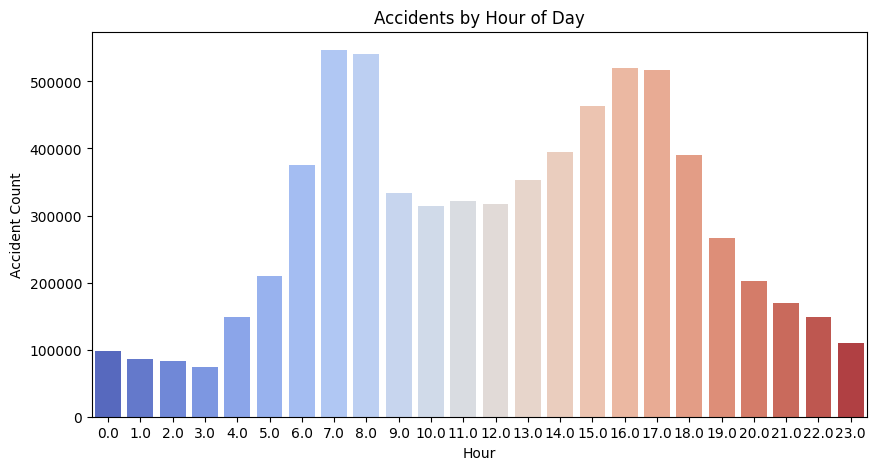

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.show()


**weather condition**

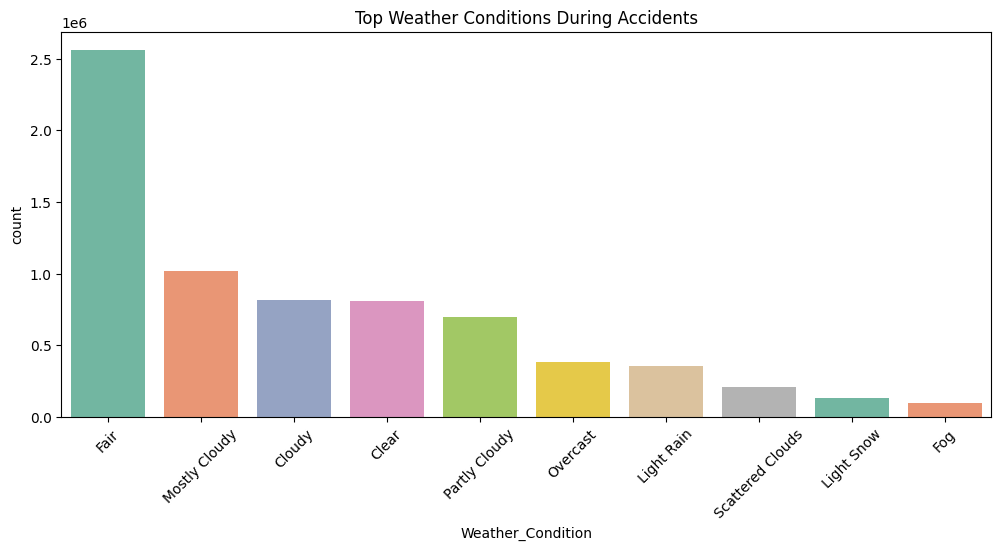

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
weather_df = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12, 5))
sns.countplot(x='Weather_Condition', data=weather_df, palette='Set2', order=top_weather)
plt.xticks(rotation=45)
plt.title('Top Weather Conditions During Accidents')
plt.show()


**Visualize Hotspots on a Map (This creates an interactive map showing where most accidents occur)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

map_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

m = folium.Map(location=[map_data['Start_Lat'].mean(), map_data['Start_Lng'].mean()], zoom_start=5)
HeatMap(data=map_data.values, radius=8).add_to(m)
m.save("accident_hotspots.html")



In [ ]:
from IPython.display import display
display(m)


In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Prepare the map
map_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)
m = folium.Map(location=[map_data['Start_Lat'].mean(), map_data['Start_Lng'].mean()], zoom_start=5)

# Apply custom gradient (cool blue → green → cyan)
HeatMap(
    map_data.values,
    radius=10,
    gradient={0.2: "orange", 0.4: "orangered", 0.6: "red", 1: "darkred"}
).add_to(m)

display(m)


**Explore Severity by Time or Weather**


Text(0.5, 1.0, 'Severity by Hour of Day')

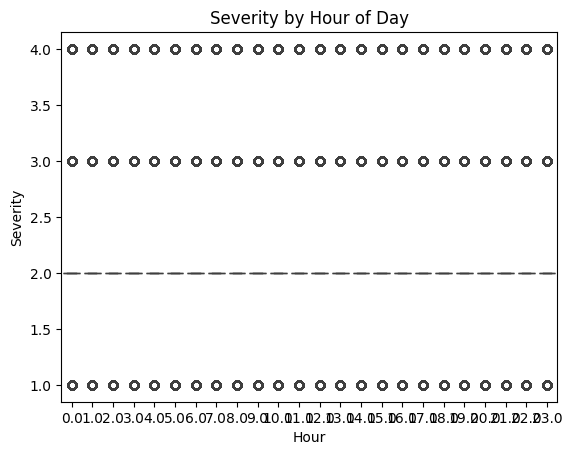

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.boxplot(x='Hour', y='Severity', data=df)
plt.title('Severity by Hour of Day')


**Correlation Heatmap**

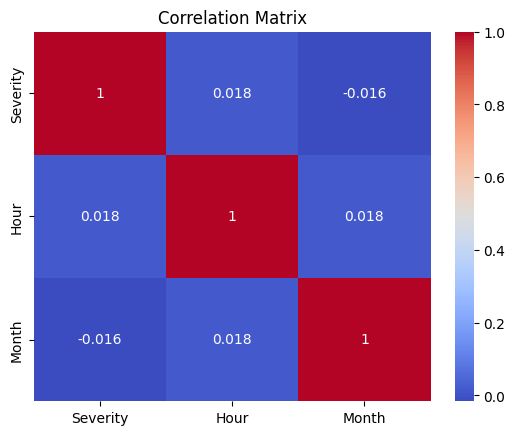

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.heatmap(df[['Severity', 'Hour', 'Month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
